#**Tugas Besar Machine Learning**
## **Jumlah Sasaran Kelahiran Hidup 2021**
### **Kelompok [6]**

Dava Firmansyah (IT-02-02 - 1202180010) 

Rasyid Sabilillah (IT-02-02 - 1202190009)

M. Iqbal Maulana (IT-02-02 - 1202190023)

M. Abdur Rohman Wachid (IT-02-02 - 1202190043)


##1. Identifikasi masalah 

###### Kondisi ibu hamil (Bumil) dinilai sangat rentan tertular berbagai virus Covid 19. Pemerintah Kota melakukan upaya pemetaan terhadap kecamatan-kecamatan untuk mengetahui kecamatan mana yang perlu diberikan penanganan lebih intensif.
###### Maka dari itu kita dapat melakukan pemetaan/pengelompokan menggunakan **Clustering Hirarchy** 

## 2. Eksplorasi data (EDA) 
###### Importing the Python Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

###### Read in the data set
###### Structured Based Data Exploration

In [ ]:
# df = pd.read_csv('Mall_Customers.csv')
from google.colab import drive
drive.mount('/content/drive/')

# train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine_Learning_Tugas4/binary_train.csv')
# test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine_Learning_Tugas4/binary_test.csv')
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/kelahiran2.xlsx')
#df = pd.read_csv('../input/voice.csv')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin,Jumlah_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita
0,Kandangan,512.0,489.0,465.0,495.0,1843.0
1,Romokalisari,45.0,43.0,42.0,44.0,226.0
2,Tambak Oso Wilangon,57.0,54.0,52.0,55.0,317.0
3,Pakal,158.0,151.0,144.0,153.0,786.0
4,Babat Jerawat,324.0,309.0,294.0,313.0,1659.0


###### Tampilkan Jumlah Variabel & Jumlah data Observasi

In [ ]:
df.shape

(154, 6)

Untuk mengetahui karakteristik kumpulan data, kita akan menggunakan metode df.describe() yang secara default memberikan ringkasan semua variabel numerik yang ada dalam kerangka data kita.

In [ ]:
df.describe()

,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin,Jumlah_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,286.844156,273.792208,260.766234,277.324675,1351.785714
std,189.303233,180.671394,172.047827,182.983977,852.563355
min,34.000000,33.000000,31.000000,33.000000,226.000000
25%,160.750000,153.750000,146.750000,155.750000,822.000000
50%,242.000000,231.000000,220.000000,234.000000,1135.500000
75%,335.750000,320.750000,305.750000,324.750000,1620.750000
max,1134.000000,1082.000000,1031.000000,1096.000000,5556.000000


## 3. Pre Processing Data
perintah df.info(), kita mendapatkan informasi lengkap dari data yang ada. yang berisi Meta-Data Lengkap dari kumpulan variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Kelurahan                       154 non-null    object 
 1   Jumlah_sasaran_ibu_hamil        154 non-null    float64
 2   Jumlah_sasaran_ibu_bersalin     154 non-null    float64
 3   Jumlah_sasaran_kelahiran_hidup  154 non-null    float64
 4   Jumlah_sasaran_bayi             154 non-null    float64
 5   Jumlah_sasaran_balita           154 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.3+ KB


Melakukan Pengecekan data yang missing dan duplicate

In [ ]:
df.drop_duplicates(subset='Kelurahan' , inplace=False)
df.isna()

,Kelurahan,Jumlah_sasaran_ibu_hamil,Jumlah_sasaran_ibu_bersalin,Jumlah_sasaran_kelahiran_hidup,Jumlah_sasaran_bayi,Jumlah_sasaran_balita
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
149,False,False,False,False,False,False
150,False,False,False,False,False,False
151,False,False,False,False,False,False
152,False,False,False,False,False,False


## 4. Visualisasi

Pengelompokan data setiap daerah di surabaya

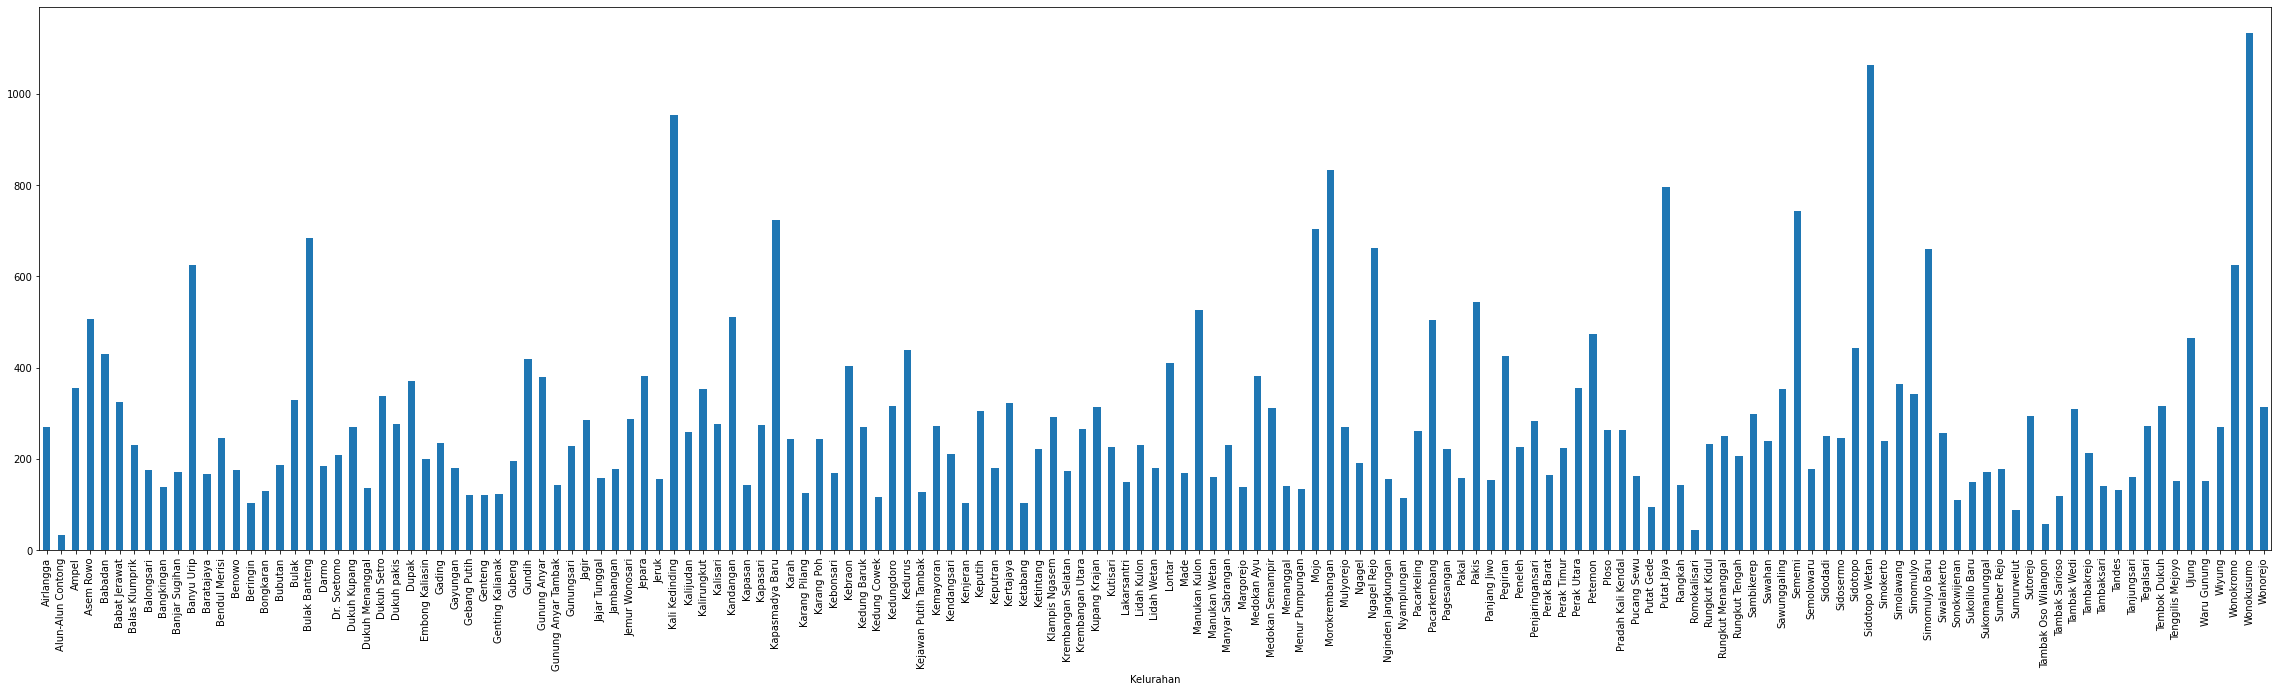

In [ ]:
plt.figure(figsize=(40,10))
df.groupby('Kelurahan')['Jumlah_sasaran_ibu_hamil'].mean().plot(kind='bar')

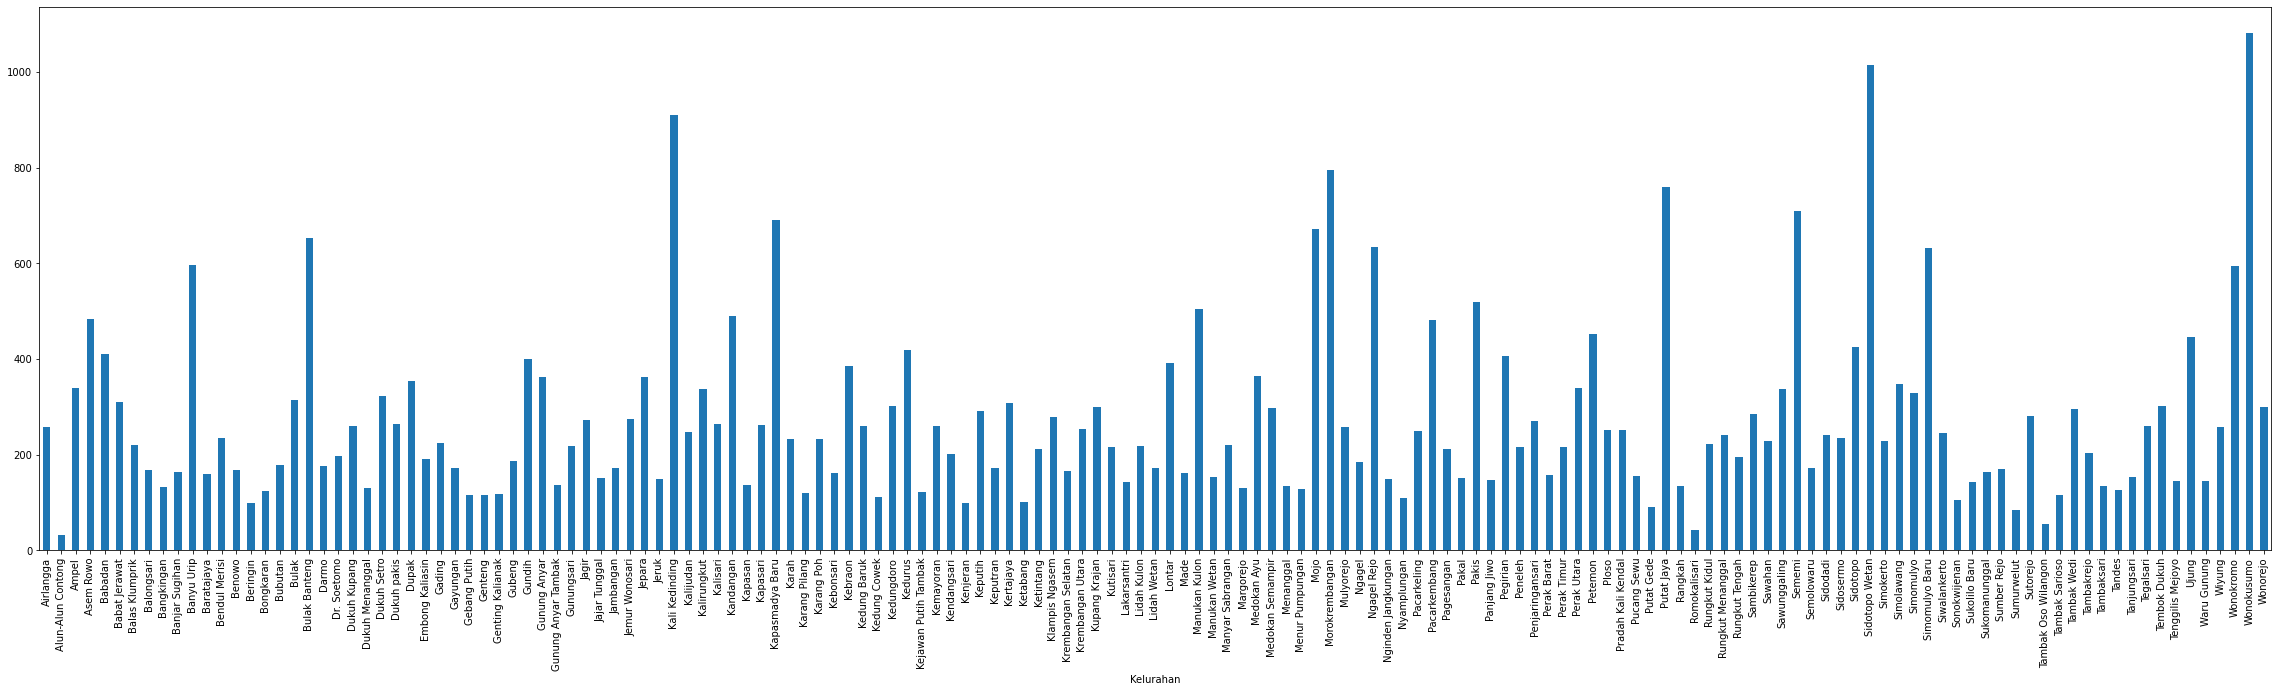

In [ ]:
plt.figure(figsize=(40,10))
df.groupby('Kelurahan')['Jumlah_sasaran_ibu_bersalin'].mean().plot(kind='bar')

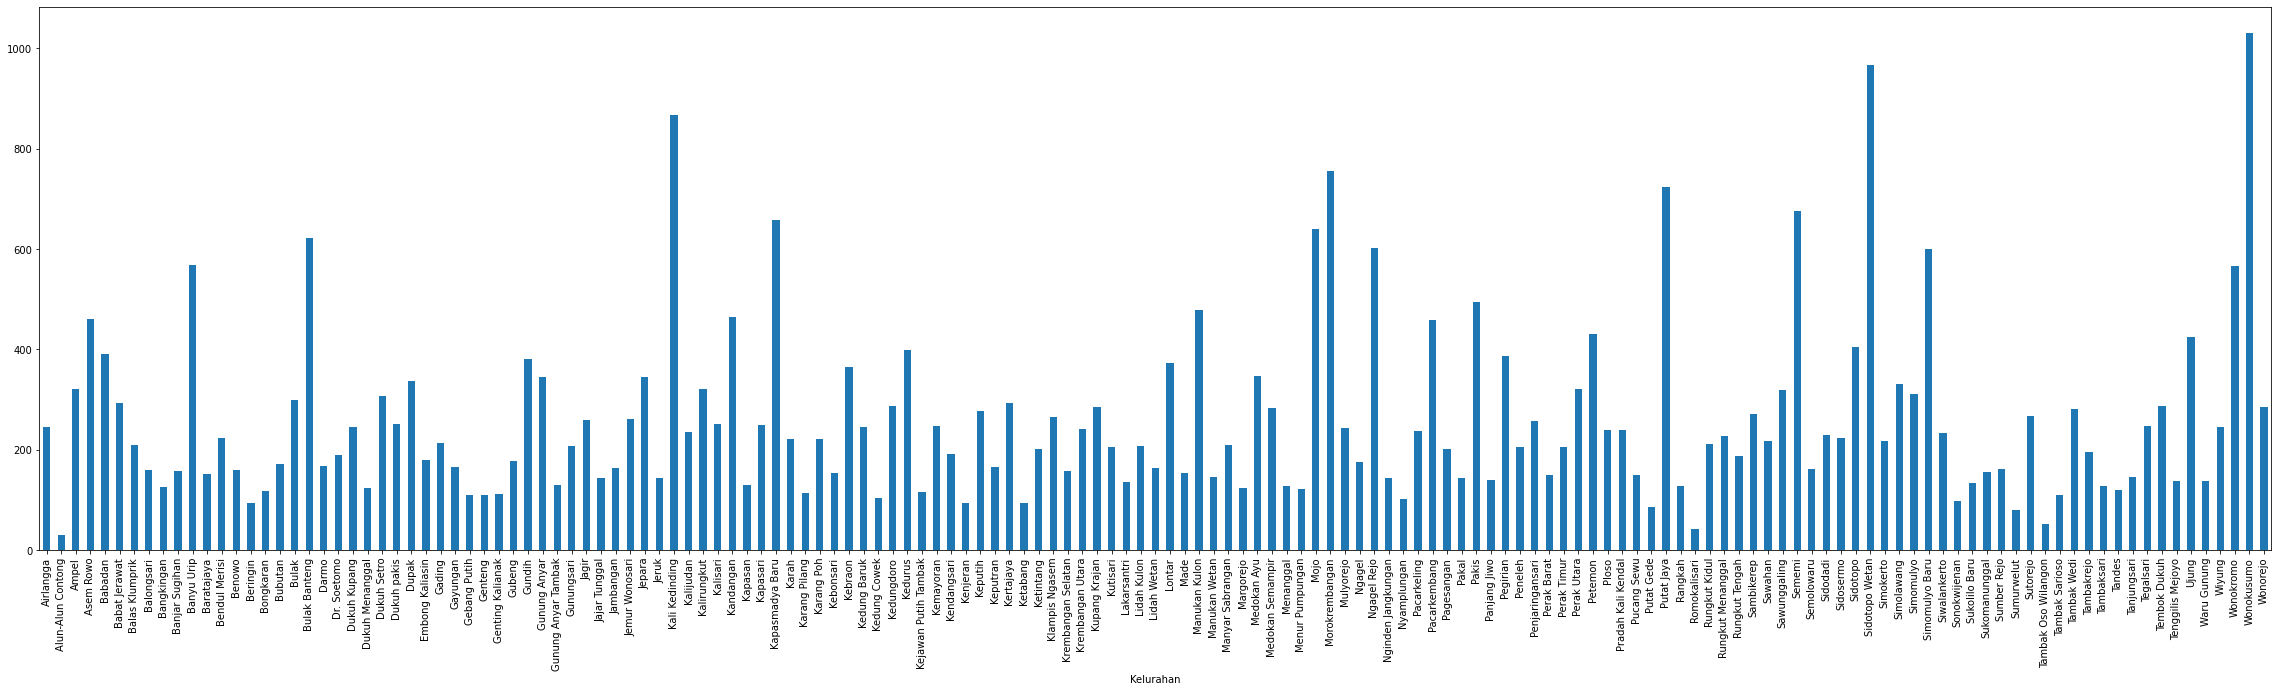

In [ ]:
plt.figure(figsize=(40,10))
df.groupby('Kelurahan')['Jumlah_sasaran_kelahiran_hidup'].mean().plot(kind='bar')

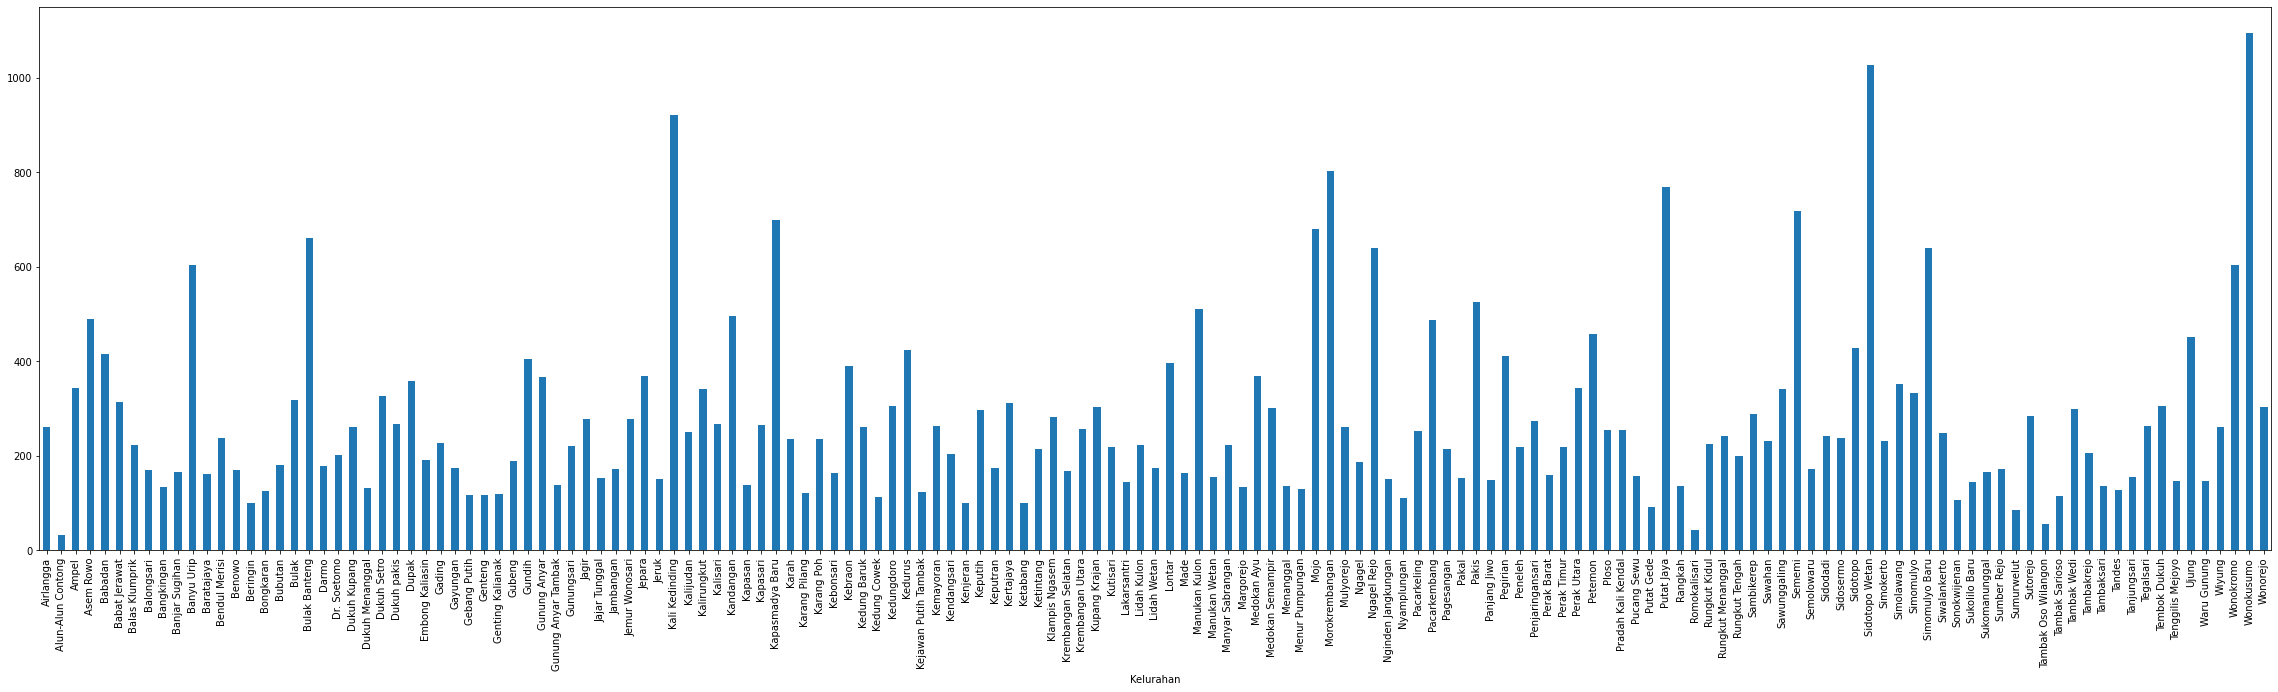

In [ ]:
plt.figure(figsize=(40,10))
df.groupby('Kelurahan')['Jumlah_sasaran_bayi'].mean().plot(kind='bar')

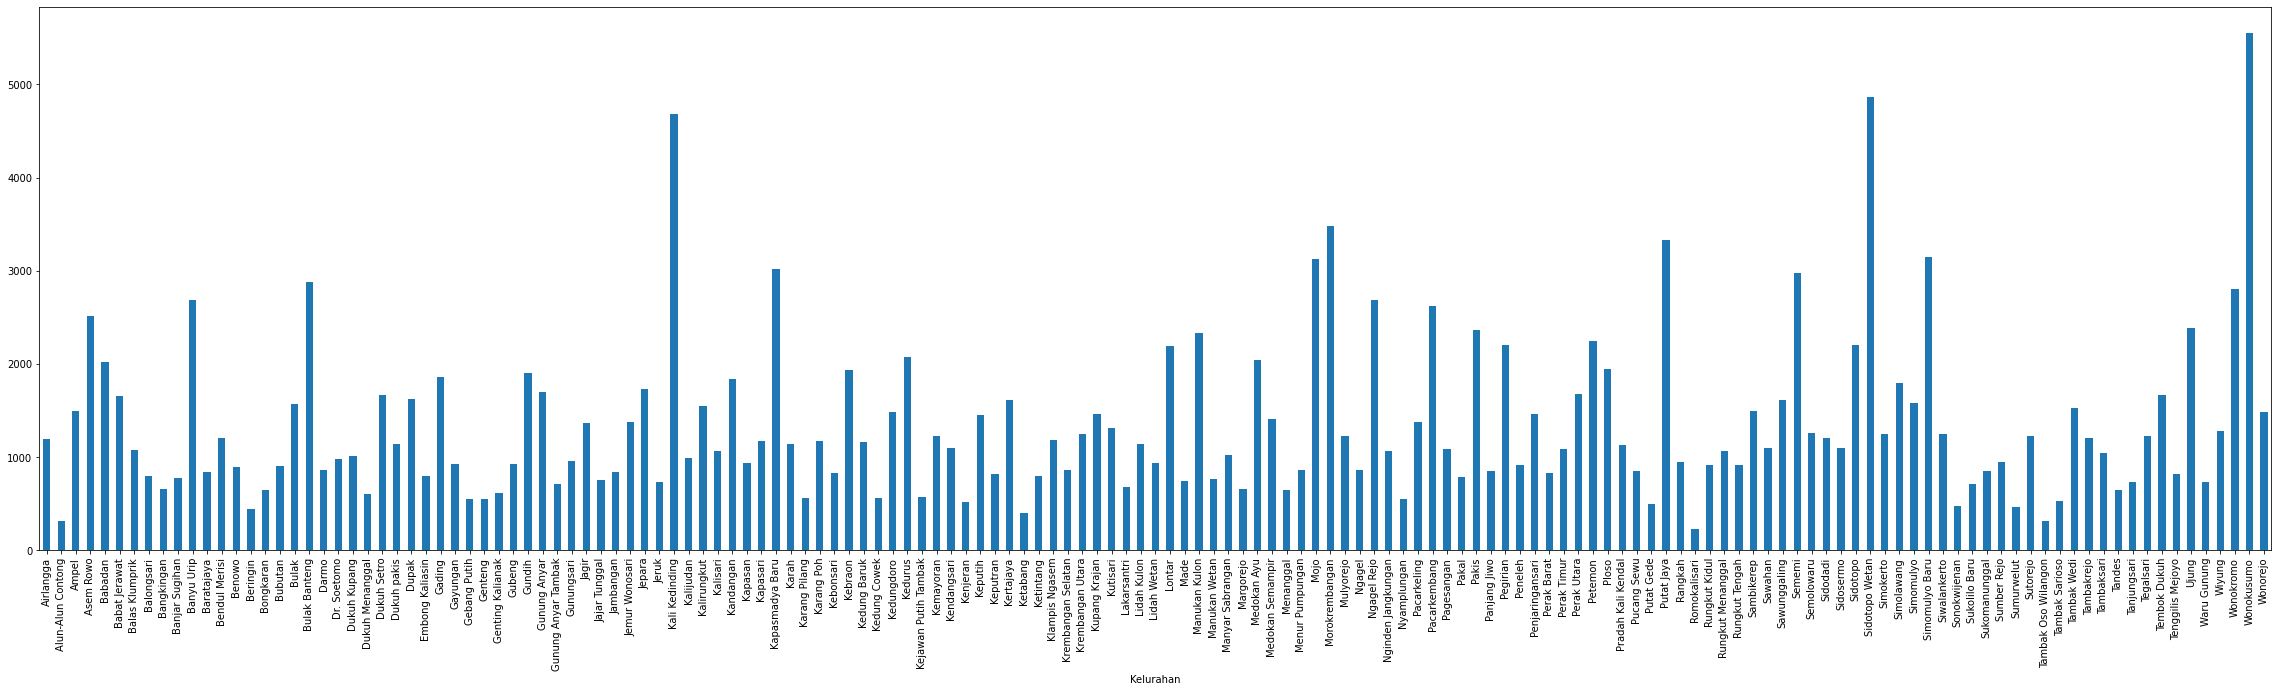

In [ ]:
plt.figure(figsize=(40,10))
df.groupby('Kelurahan')['Jumlah_sasaran_balita'].mean().plot(kind='bar')

Persebaran Data dari rata-rata daerah di surabaya

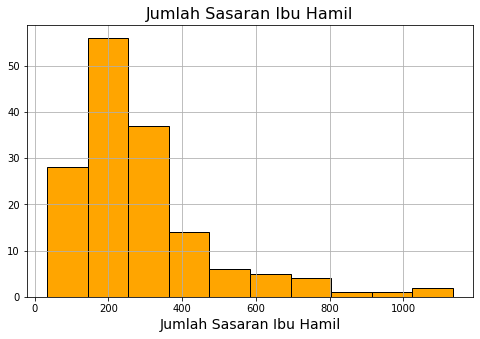

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah Sasaran Ibu Hamil",fontsize=16)
plt.xlabel ("Jumlah Sasaran Ibu Hamil",fontsize=14)
plt.grid(True)
plt.hist(df['Jumlah_sasaran_ibu_hamil'],color='orange',edgecolor='k')
plt.show()

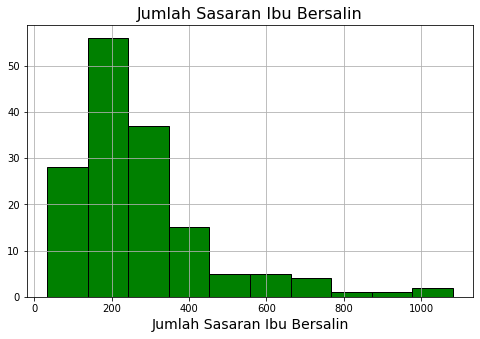

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah Sasaran Ibu Bersalin",fontsize=16)
plt.xlabel ("Jumlah Sasaran Ibu Bersalin",fontsize=14)
plt.grid(True)
plt.hist(df['Jumlah_sasaran_ibu_bersalin'],color='green',edgecolor='k')
plt.show()

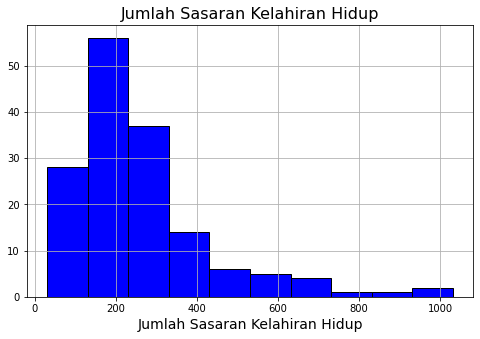

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah Sasaran Kelahiran Hidup",fontsize=16)
plt.xlabel ("Jumlah Sasaran Kelahiran Hidup",fontsize=14)
plt.grid(True)
plt.hist(df['Jumlah_sasaran_kelahiran_hidup'],color='blue',edgecolor='k')
plt.show()

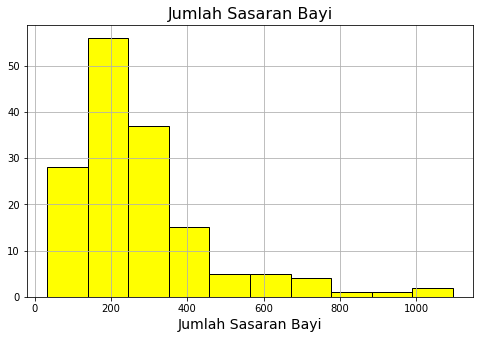

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah Sasaran Bayi",fontsize=16)
plt.xlabel ("Jumlah Sasaran Bayi",fontsize=14)
plt.grid(True)
plt.hist(df['Jumlah_sasaran_bayi'],color='yellow',edgecolor='k')
plt.show()

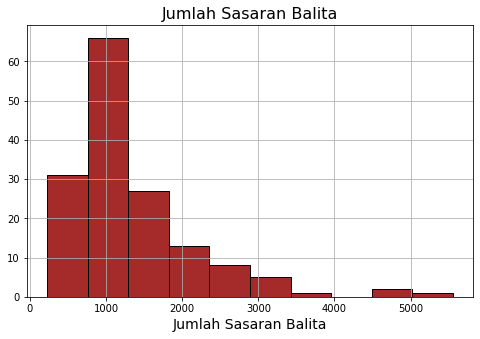

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah Sasaran Balita",fontsize=16)
plt.xlabel ("Jumlah Sasaran Balita",fontsize=14)
plt.grid(True)
plt.hist(df['Jumlah_sasaran_balita'],color='brown',edgecolor='k')
plt.show()

### Lakukan Visualisasi Korelasi antara Variabel A dan Variabel B

Bagaimana dengan korelasi antara Jumlah Sasaran Ibu Hamil dan Jumlah Sasaran Ibu Bersalin, Ternyata kedua data memiliki kedekatan yang cukup baik

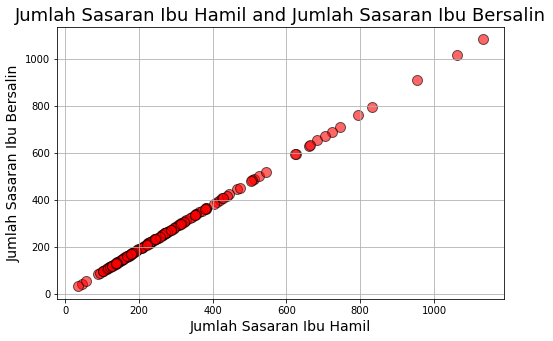

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah Sasaran Ibu Hamil and Jumlah Sasaran Ibu Bersalin",fontsize=18)
plt.xlabel ("Jumlah Sasaran Ibu Hamil",fontsize=14)
plt.ylabel ("Jumlah Sasaran Ibu Bersalin",fontsize=14)
plt.grid(True)
plt.scatter(df['Jumlah_sasaran_ibu_hamil'],df['Jumlah_sasaran_ibu_bersalin'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

Bagaimana dengan korelasi antara Jumlah Sasaran Kelahiran Hidup and Jumlah Sasaran Bayi, Ternyata kedua data memiliki kedekatan yang cukup baik

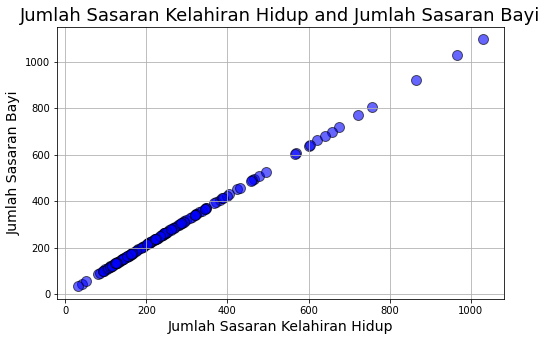

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah Sasaran Kelahiran Hidup and Jumlah Sasaran Bayi",fontsize=18)
plt.xlabel ("Jumlah Sasaran Kelahiran Hidup",fontsize=14)
plt.ylabel ("Jumlah Sasaran Bayi",fontsize=14)
plt.grid(True)
plt.scatter(df['Jumlah_sasaran_kelahiran_hidup'],df['Jumlah_sasaran_bayi'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

Bagaimana dengan korelasi antara Jumlah Sasaran Kelahiran Hidup and Jumlah Sasaran Balita, Ternyata kedua data memiliki kedekatan yang cukup baik

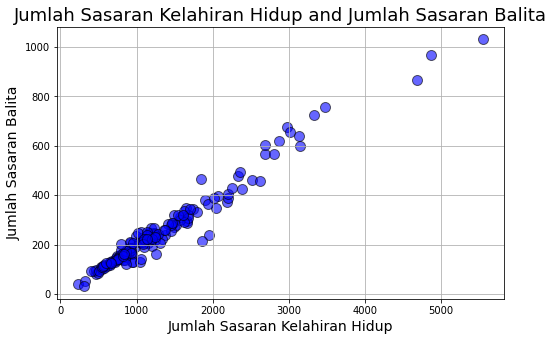

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Jumlah Sasaran Kelahiran Hidup and Jumlah Sasaran Balita",fontsize=18)
plt.xlabel ("Jumlah Sasaran Kelahiran Hidup",fontsize=14)
plt.ylabel ("Jumlah Sasaran Balita",fontsize=14)
plt.grid(True)
plt.scatter(df['Jumlah_sasaran_balita'],df['Jumlah_sasaran_kelahiran_hidup'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

## Strategi
** Setelah dilakukan visualisasi data variabel terdekat, kita lakukan pengelompokan sasaran berdasarkan jumlah rata-rata sasaran tiap daerah di surabaya, apakah ada kluster khusus yang dapat ditargetkan pemkot surabaya untuk meningkatkan fasilitas kesehatan khususnya untuk ibu hamil **

Kita akan melihat bahwa pengelompokan hierarki dengan dendogram akan memberi kita wawasan yang baik tentang jumlah cluster yang optimal.

## 5. Eksperimen
## Dendograms

In [ ]:
X = df.iloc[:,[1,5]].values

### _Ward_ distance matrix
We will use 'Ward' distance matrix for this dendogram.
$$d(u,v) = \sqrt{\frac{|v|+|s|}{T}d(v,s)^2+ \frac{|v|+|t|}{T}d(v,t)^2- \frac{|v|}{T}d(s,t)^2}$$

where **$u$** is the newly joined cluster consisting of clusters **$s$** and **$t$**, **$v$** is an unused cluster in the forest, **$T=|v|+|s|+|t|$**, and **$|*|$** is the cardinality of its argument. This is also known as the incremental algorithm.

In [ ]:
import scipy.cluster.hierarchy as sch

# plt.figure(figsize=(25,6))
# plt.title('Dendrogram')
# plt.xlabel('Jumlah Sasaran')
# plt.ylabel('Euclidean distances')
# #plt.grid(True)
# dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
# plt.show()

## Metode Single linkage

In [ ]:
# plt.figure(figsize=(25,6))
# plt.title('Dendrogram')
# plt.xlabel('Jumlah Sasaran')
# plt.ylabel('Euclidean distances')
# #plt.grid(True)
# dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
# plt.show()

## Metode Complete linkage

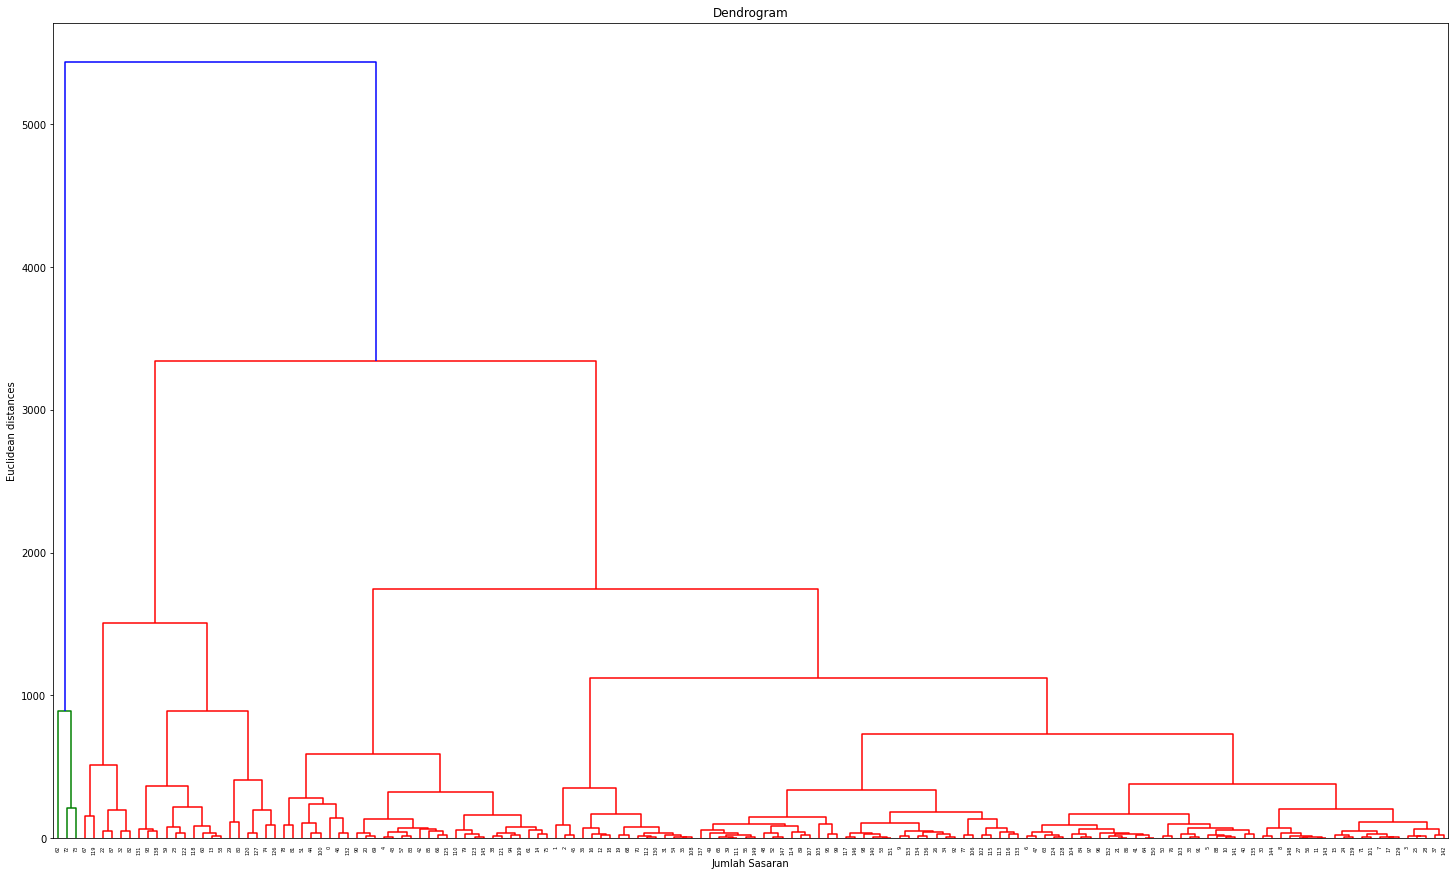

In [ ]:
plt.figure(figsize=(25,15))
plt.title('Dendrogram')
plt.xlabel('Jumlah Sasaran')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.show()

## 6. Evaluasi 
### Jumlah cluster yang optimal

Seringkali, jumlah cluster yang optimal dapat ditemukan dari Dendogram dengan cara yang sederhana.
* Carilah bentangan garis vertikal terpanjang yang tidak dilintasi oleh garis horizontal ***diperpanjang*** (di sini *diperpanjang* berarti garis horizontal yaitu pemisah cluster diperpanjang tanpa batas ke kedua arah).
* Sekarang ambil titik mana pun pada bentangan garis itu dan gambarlah garis horizontal imajiner.
* Hitung berapa banyak garis vertikal yang dilintasi garis khayal ini.
* Itu kemungkinan jumlah cluster yang optimal.

**Idenya ditunjukkan pada gambar berikut. Di sini jumlah cluster yang optimal bisa menjadi 4 atau 5. Denganmelihat kemungkinan dari ward dan complete** 

In [ ]:
# plt.figure(figsize=(25,15))
# plt.title('Dendrogram')
# plt.xlabel('Jumlah Sasaran')
# plt.ylabel('Euclidean distances')
# plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
# plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
# #plt.grid(True)
# dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
# plt.show()

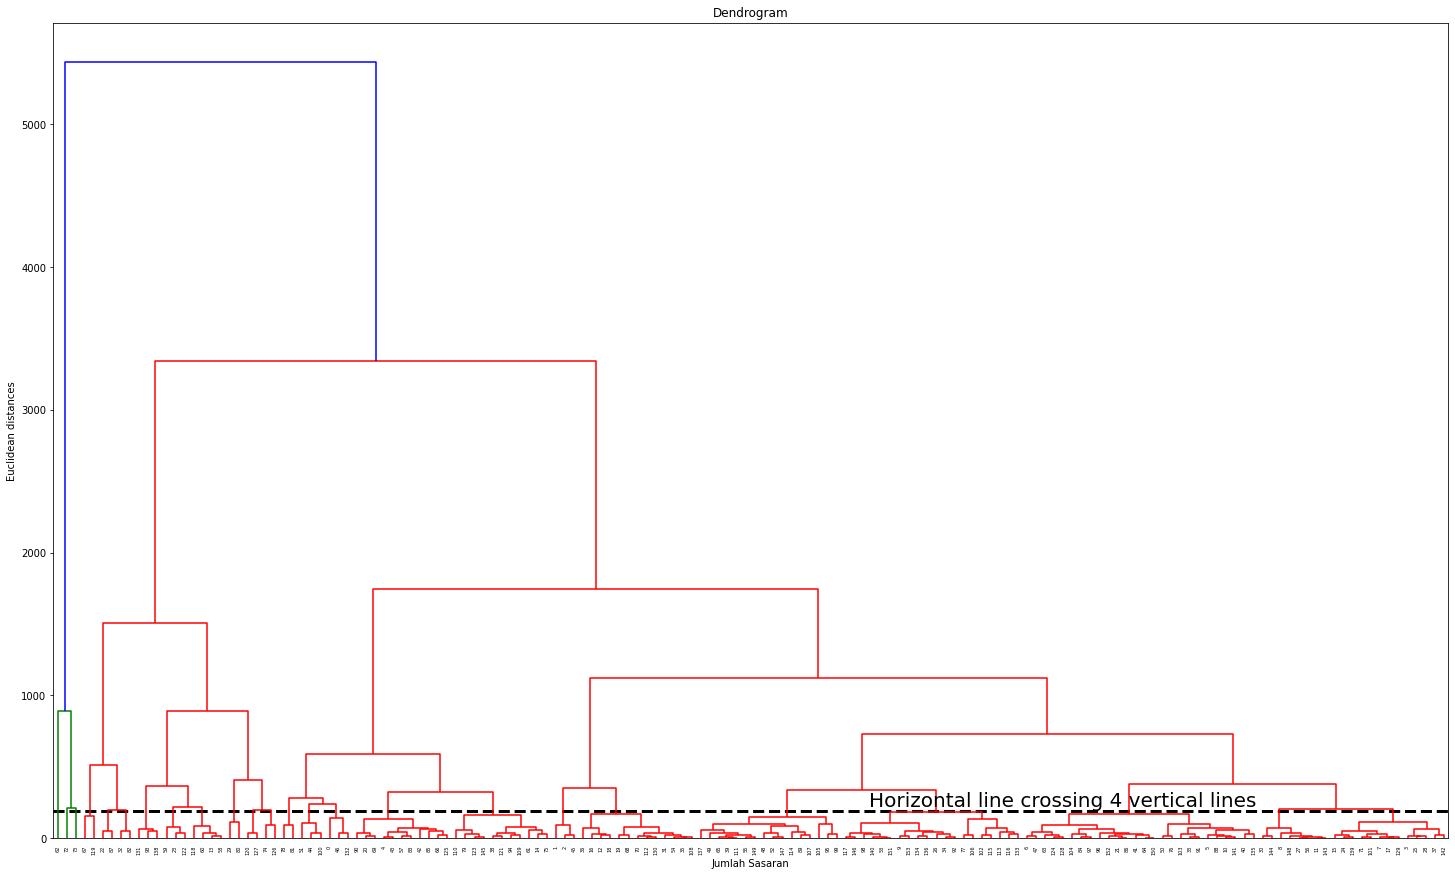

In [ ]:
plt.figure(figsize=(25,15))
plt.title('Dendrogram')
plt.xlabel('Jumlah Sasaran')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 4 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.show()

## 7. Kesimpulan
## Hierarchical Clustering

### Build the model

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# y_hc = hc.fit_predict(X)

### Plot the clusters and label customer types
Plot kluster dan beri label jenis Pasien
*   Careful - Jumlah Fasilitas tinggi tetapi Jumlah Pasien rendah
*   Standar - Jumlah Fasilitas menengah dan Jumlah Pasien menengah
*   Target group - Jumlah Fasilitas menengah ke atas dan Jumlah Pasien tinggi (harus ditargetkan oleh Pemkot)
*   Careless - Jumlah Fasilitas rendah tetapi Jumlah Pasien tinggi (memiliki resiko yang cukup tinggi, bisa terjadi colabs)
*   Sensible - Jumlah Fasilitas rendah dan Jumlah Pasien rendah

In [ ]:
# plt.figure(figsize=(12,7))
# plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
# plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
# plt.title('Clustering of Jumlah Sasaran',fontsize=20)
# plt.xlabel('Jumlah Sasaran Ibu Hamil',fontsize=16)
# plt.ylabel('Jumlah Sasaran Ibu Bersalin',fontsize=16)
# plt.legend(fontsize=16)
# plt.grid(True)
# plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
# plt.show()

## Hasil metode complete

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
y_hc

array([3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0,
       4, 2, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3,
       3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 2, 2, 3, 1, 0, 0, 0,
       3, 4, 0, 3, 0, 0, 1, 1, 2, 3, 0, 0, 3, 3, 2, 3, 4, 3, 0, 3, 0, 4,
       0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 3, 2, 3, 0, 3, 2, 2, 0, 0, 0, 2,
       3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0])

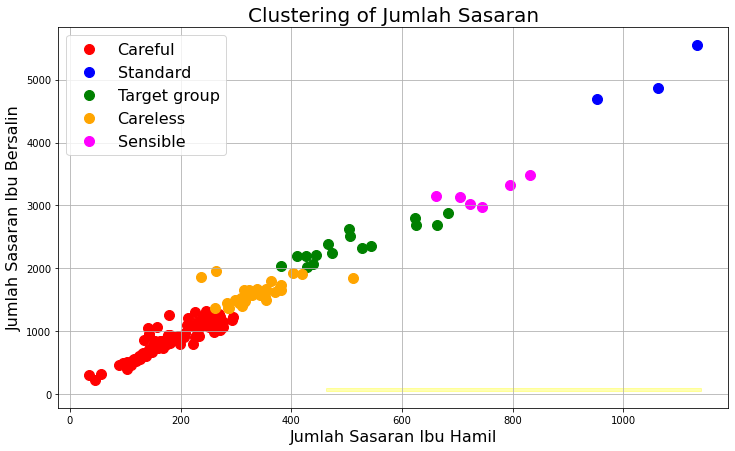

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering of Jumlah Sasaran',fontsize=20)
plt.xlabel('Jumlah Sasaran',fontsize=16)
plt.ylabel('Jumlah Sasaran Ibu Bersalin',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

##8. Rekomendasi

Pengelompokan Setiap Segment Clsutering Sasaran

In [ ]:
segment = pd.Series(y_hc, name="segment")

In [ ]:
# results = pd.concat([df.iloc[:,[1,2]], segment_4], axis=1)

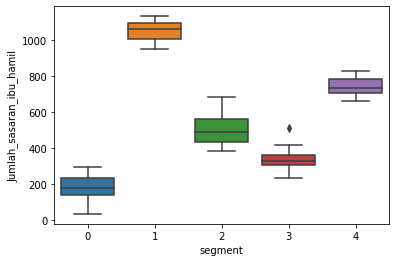

In [ ]:
results = pd.concat([df.iloc[:,[1,2]], segment], axis=1)
import seaborn as sns
sns.boxplot(x=results['segment'],y=results["Jumlah_sasaran_ibu_hamil"])

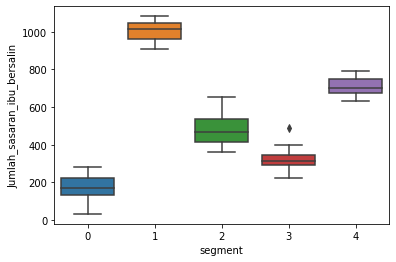

In [ ]:
sns.boxplot(x=results['segment'],y=results["Jumlah_sasaran_ibu_bersalin"])

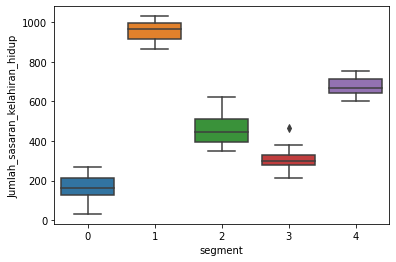

In [ ]:
results = pd.concat([df.iloc[:,[3,4]], segment], axis=1)
import seaborn as sns
sns.boxplot(x=results['segment'],y=results["Jumlah_sasaran_kelahiran_hidup"])

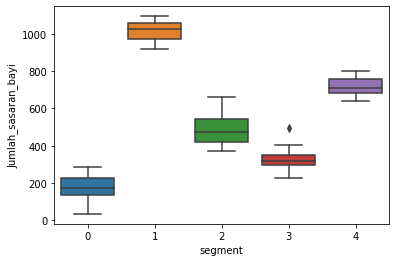

In [ ]:
sns.boxplot(x=results['segment'],y=results["Jumlah_sasaran_bayi"])

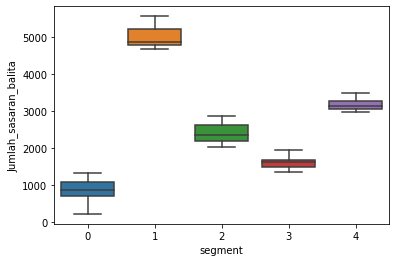

In [ ]:
results = pd.concat([df.iloc[:,[4,5]], segment], axis=1)
import seaborn as sns
sns.boxplot(x=results['segment'],y=results["Jumlah_sasaran_balita"])

Jumlah_sasaran_ibu_hamil
Jumlah_sasaran_ibu_bersalin
Jumlah_sasaran_kelahiran_hidup
Jumlah_sasaran_bayi
Jumlah_sasaran_balita

Plot kluster dan beri label jenis Pasien
Careful - Jumlah Fasilitas tinggi tetapi Jumlah Pasien rendah
Standar - Jumlah Fasilitas menengah dan Jumlah Pasien menengah
Target group - Jumlah Fasilitas menengah ke atas dan Jumlah Pasien tinggi (harus ditargetkan oleh Pemkot)
Careless - Jumlah Fasilitas rendah tetapi Jumlah Pasien tinggi (memiliki resiko yang cukup tinggi, bisa terjadi colabs)
Sensible - Jumlah Fasilitas rendah dan Jumlah Pasien rendah

Sumber data yang dipakai dalam penelitian ini diperoleh dari website berita pemerintah kota Surabaya yang berjudul “CEGAH KEMATIAN IBU DAN BAYI, PEMKOT SURABAYA LAKUKAN PEMETAAN DAN DETEKSI DINI RS RUJUKAN BUMIL”. Diunggah pada hari kamis, 9 Juli 2020\

Jumlah sasaran ibu hamil	Jumlah sasaran ibu bersalin/nifas	Jumlah sasaran kelahiran hidup	Jumlah sasaran bayi	Jumlah sasaran balita